In [54]:
%pip install -q gymnasium
%pip install -q matplotlib
%pip install gymnasium[toy-text]

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [55]:
import gymnasium as gym
import random
import numpy as np
import matplotlib.pyplot as plt

In [56]:
environment = gym.make("FrozenLake-v1", is_slippery=False, render_mode="rgb_array")
# environment = gym.make("FrozenLake-v1", is_slippery=False, render_mode="human") # If run change number of episodes to 100
environment.reset()
tablero = environment.render()
# plt.imshow(tablero)

In [57]:
from os import environ
nb_states = environment.observation_space.n
nb_actions = environment.action_space.n
qtable = np.zeros((nb_states, nb_actions))
print(qtable)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [58]:
action = 2
environment.step(action)
tablero = environment.render()
# plt.imshow(tablero)

In [59]:
action = environment.action_space.sample()
new_state, reward, terminated, truncated, info = environment.step(action)
tablero = environment.render()
print(f'Reward = {reward} terminated = {terminated} truncated = {truncated} new_state = {new_state}')
# plt.imshow(tablero)

Reward = 0.0 terminated = False truncated = False new_state = 1


In [60]:
# Hyperparameters
episodes = 10000       # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset()[0]
    # state = environment.reset()
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")

    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Recogemos la acción con mejor resultado
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])

        # Si no hay mejor acción se elige al azar
        else:
          action = environment.action_space.sample()

        # Se mueve a la dirección deseada
        new_state, reward, terminated, truncated, info = environment.step(action)
        done = terminated or truncated
        # Actualización Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        # Actualizar el estado actual del juego
        state = new_state

        # Si hay recompensa es que ganó
        if reward:
          outcomes[-1] = "Success"


print()
print('===========================================')
print('Q-table after training:')
print(qtable)

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.      0.59049 0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.6561  0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.729   0.     ]
 [0.      0.81    0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.9     0.     ]
 [0.      0.      1.      0.     ]
 [0.      0.      0.      0.     ]]


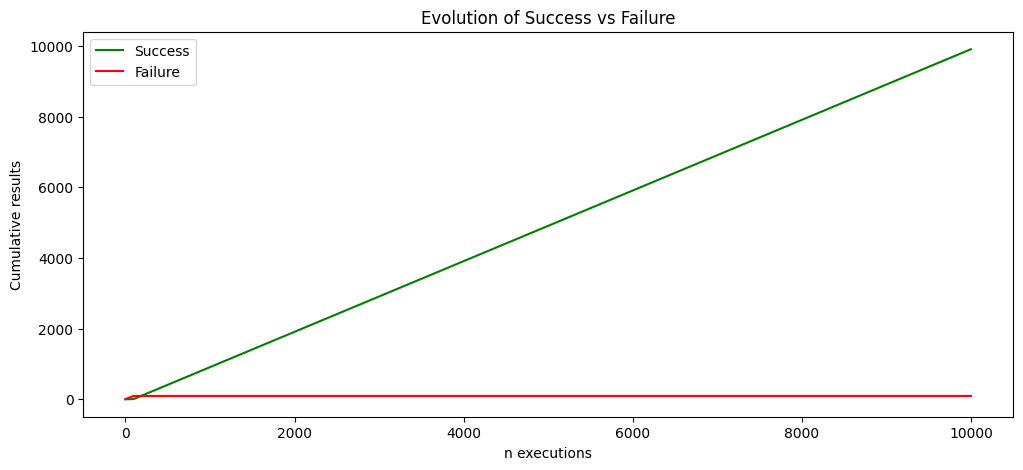

In [61]:
# Plot outcomes
plt.figure(figsize=(12, 5))
s_count = []
f_count = []
successes = 0
failures = 0
for result in outcomes:
    if result == 'Success': successes += 1
    else: failures += 1
    s_count.append(successes)
    f_count.append(failures)

# Crear la gráfica de líneas
plt.plot(s_count, label='Success', color='green')
plt.plot(f_count, label='Failure', color='red')
plt.xlabel('n executions')
plt.ylabel('Cumulative results')
plt.title('Evolution of Success vs Failure')
plt.legend()

# Mostrar la gráfica
plt.show()

In [62]:
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 10000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.001  # Fixed amount to decrease

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset()[0]
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")

    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Generate a random number between 0 and 1
        rnd = np.random.random()

        # If random number < epsilon, take a random action
        if rnd < epsilon:
          action = environment.action_space.sample()
        # Else, take the action with the highest value in the current state
        else:
          action = np.argmax(qtable[state])

        # Implement this action and move the agent in the desired direction
        #new_state, reward, done, info = environment.step(action)
        new_state, reward, terminated, truncated, info = environment.step(action)
        done = terminated or truncated
        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        # Update our current state
        state = new_state

        # If we have a reward, it means that our outcome is a success
        if reward:
          outcomes[-1] = "Success"

    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.531441   0.59049    0.59049    0.531441  ]
 [0.531441   0.         0.6561     0.59049   ]
 [0.59049    0.729      0.59049    0.6561    ]
 [0.6561     0.         0.59048998 0.59048797]
 [0.59048999 0.6561     0.         0.531441  ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.         0.6561    ]
 [0.         0.         0.         0.        ]
 [0.65609849 0.         0.729      0.59048998]
 [0.6561     0.81       0.81       0.        ]
 [0.729      0.9        0.         0.729     ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.80999961 0.9        0.72899961]
 [0.81       0.9        1.         0.81      ]
 [0.

In [63]:
environment.close()

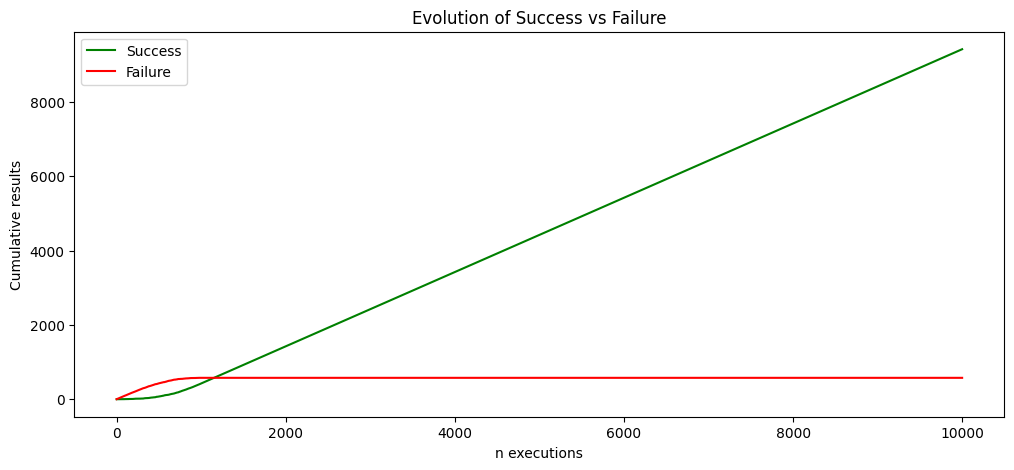

In [64]:
# Plot outcomes
plt.figure(figsize=(12, 5))
s_count = []
f_count = []
successes = 0
failures = 0
for result in outcomes:
    if result == 'Success': successes += 1
    else: failures += 1
    s_count.append(successes)
    f_count.append(failures)

# Crear la gráfica de líneas
plt.plot(s_count, label='Success', color='green')
plt.plot(f_count, label='Failure', color='red')
plt.xlabel('n executions')
plt.ylabel('Cumulative results')
plt.title('Evolution of Success vs Failure')
plt.legend()

# Mostrar la gráfica
plt.show()